In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [35]:
df=pd.read_csv("iris.csv")
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
df.shape

(150, 5)

In [37]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


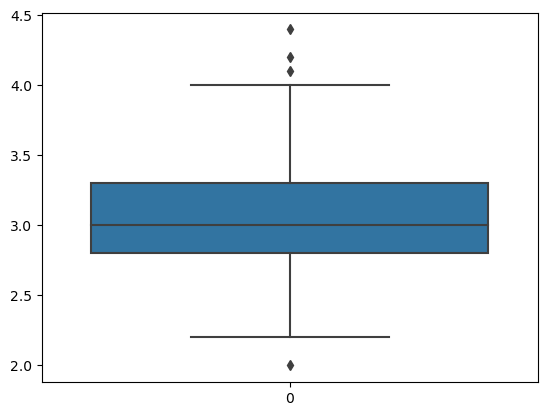

In [40]:
sns.boxplot(df['sepal.width'])
plt.show()

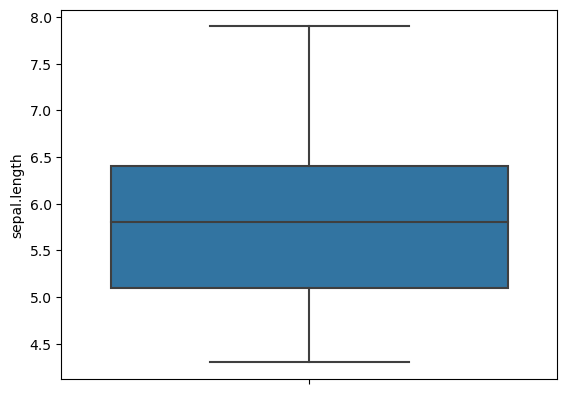

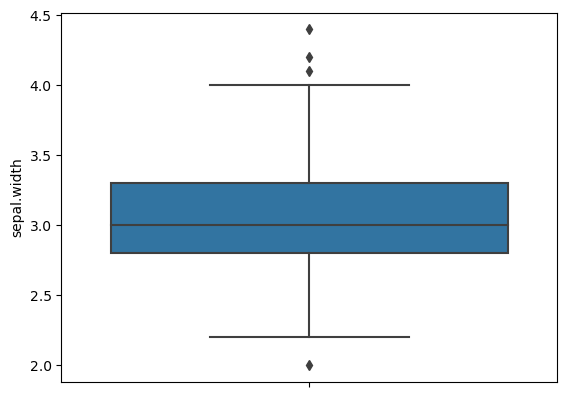

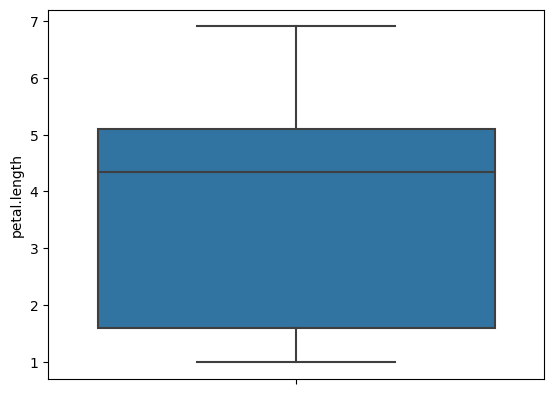

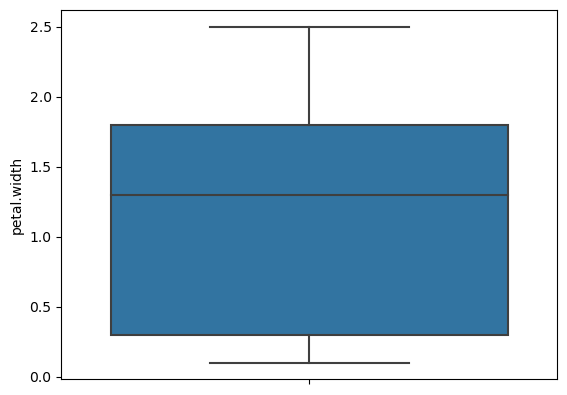

In [41]:
a=df.columns[0:-1]
for i in a:
    sns.boxplot(y=df[i])
    plt.show()
    

In [42]:
q1=df['sepal.width'].quantile(q=0.25)
q3=df['sepal.width'].quantile(q=0.75)
iqr=q3-q1

In [43]:
df=df[(df['sepal.width']>=q1-1.5*iqr) & (df['sepal.width']<=q3+1.5*iqr) ]
df.shape

(146, 5)

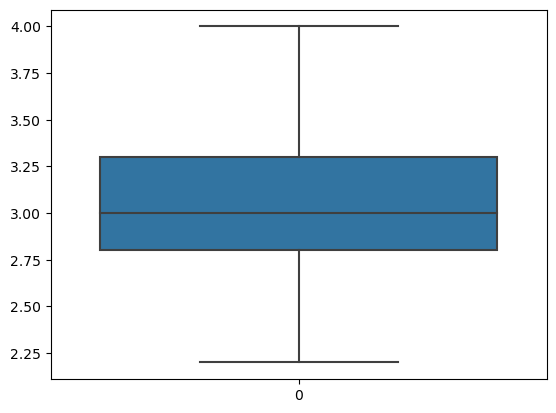

In [44]:
sns.boxplot(df['sepal.width'])
plt.show()

### splitting data into train and test as well as into input and output

In [45]:
Y=df['variety']
X=df.drop("variety",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.33,random_state=1)
X.shape,Y.shape

((146, 4), (146,))

In [46]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

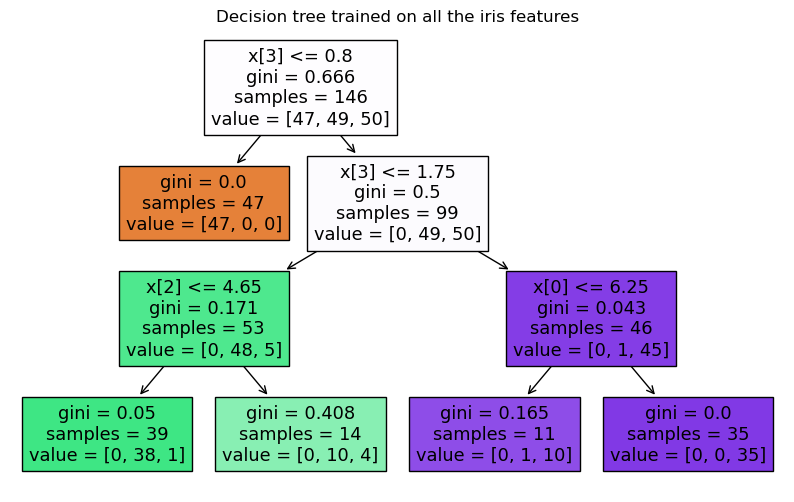

In [47]:

plt.figure(figsize=(10,6))
plot_tree(dt,filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [48]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train, y_train)

y_pred_train = dt.predict(x_train)
y_pred = dt.predict(x_test)
y_prob = dt.predict_proba(x_test)

In [49]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9795918367346939


In [50]:
y_train.shape,y_test.shape

((48,), (98,))

In [51]:
print('confusion matrix of Decision Tree-Train: ', confusion_matrix(y_pred_train, y_train))
print('confusion matrix of Decision Tree-Test: ', confusion_matrix(y_pred, y_test))

confusion matrix of Decision Tree-Train:  [[16  0  0]
 [ 0 18  0]
 [ 0  0 14]]
confusion matrix of Decision Tree-Test:  [[31  0  0]
 [ 0 29  0]
 [ 0  2 36]]
